# Task 6 

In [95]:
import numpy as np
import cv2
from skimage import measure, segmentation
import matplotlib.pyplot as plt
from PIL import Image
import morphology 
import pandas as pd 



In [60]:
root_mask = cv2.imread("root_mask.tif", cv2.IMREAD_GRAYSCALE)
# This is the root mask image. It is a binary image with the root in white and the background in black.

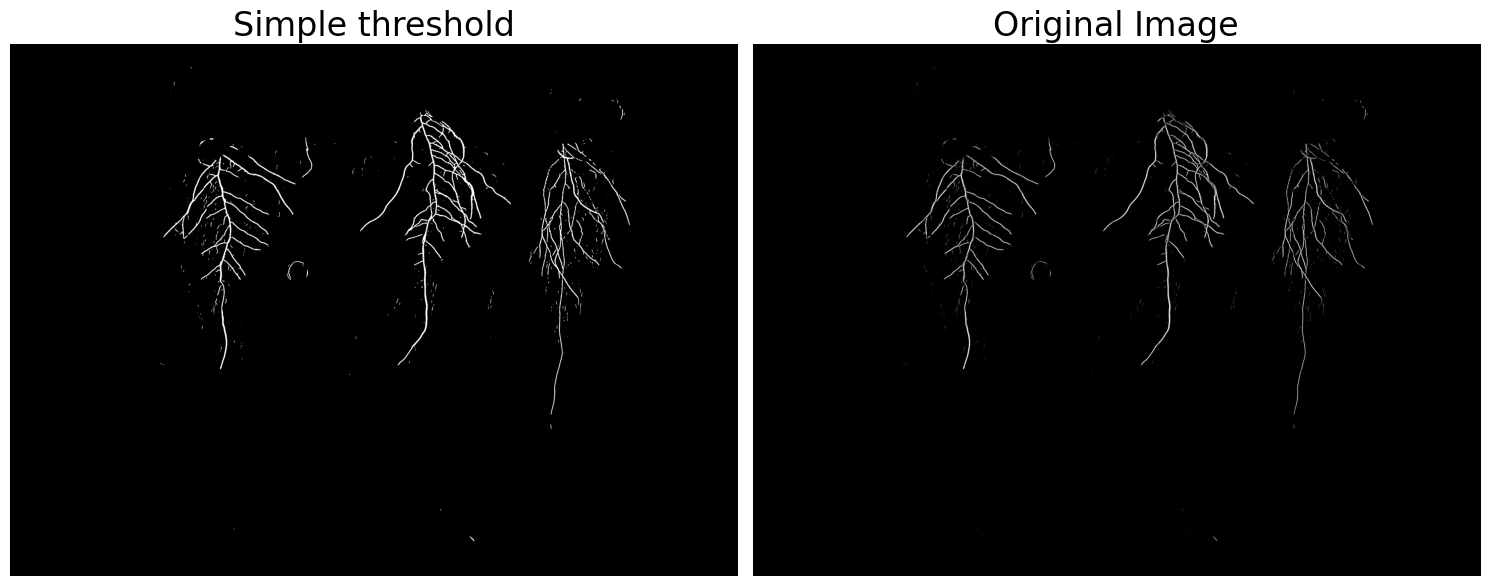

In [69]:
# Apply Simple Thresholding

threshold = 32
_, simple_thresh = cv2.threshold(root_mask,threshold , 255, cv2.THRESH_BINARY)  

# Plot the result
plt.figure(figsize=(15, 7))  # Larger size for better visualization
plt.subplot(1, 2, 1)
plt.title("Simple threshold", fontsize=24)
plt.imshow(simple_thresh , cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Original Image", fontsize=24)
plt.imshow(root_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

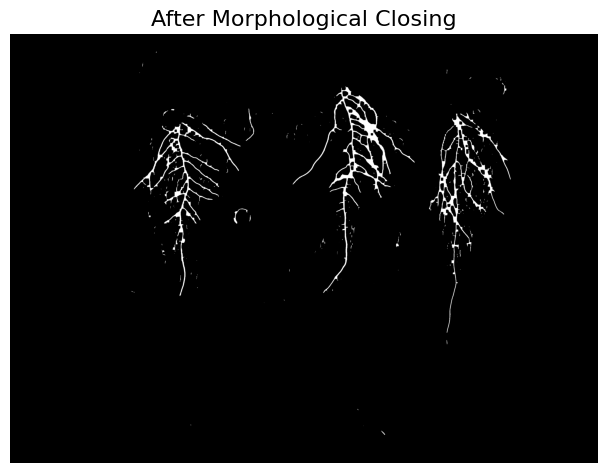

In [ ]:
# Define a kernel for morphological operations
kernel_size = 15

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))  # Adjust kernel size as needed

# Apply Closing to fill gaps
closed_mask = cv2.morphologyEx(simple_thresh , cv2.MORPH_CLOSE, kernel)

# Plot the result


plt.title("After Morphological Closing", fontsize=16)
plt.imshow(closed_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


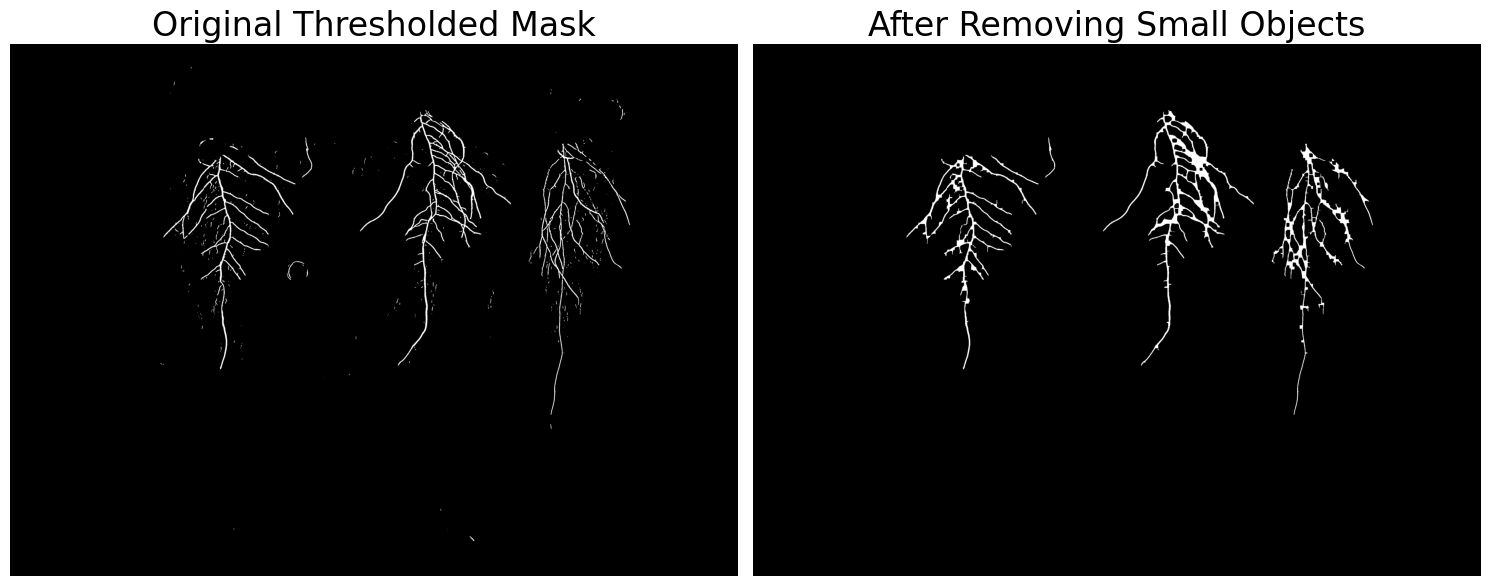

In [73]:
from skimage.morphology import remove_small_objects
import numpy as np

# Ensure the mask is binary (required for skimage's remove_small_objects)
binary_mask = closed_mask > 0  # Convert to boolean (True for object pixels)

# Remove small objects (size threshold can be adjusted as needed)
cleaned_mask = remove_small_objects(binary_mask, min_size=1400)  # Adjust min_size to suit your needs

# Convert back to uint8 for visualization
cleaned_mask = (cleaned_mask * 255).astype(np.uint8)

# Plot the result
plt.figure(figsize=(15, 7))  # Larger size for better visualization
plt.subplot(1, 2, 1)
plt.title("Original Thresholded Mask", fontsize=24)
plt.imshow(simple_thresh, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After Removing Small Objects", fontsize=24)
plt.imshow(cleaned_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Number of connected components: 6


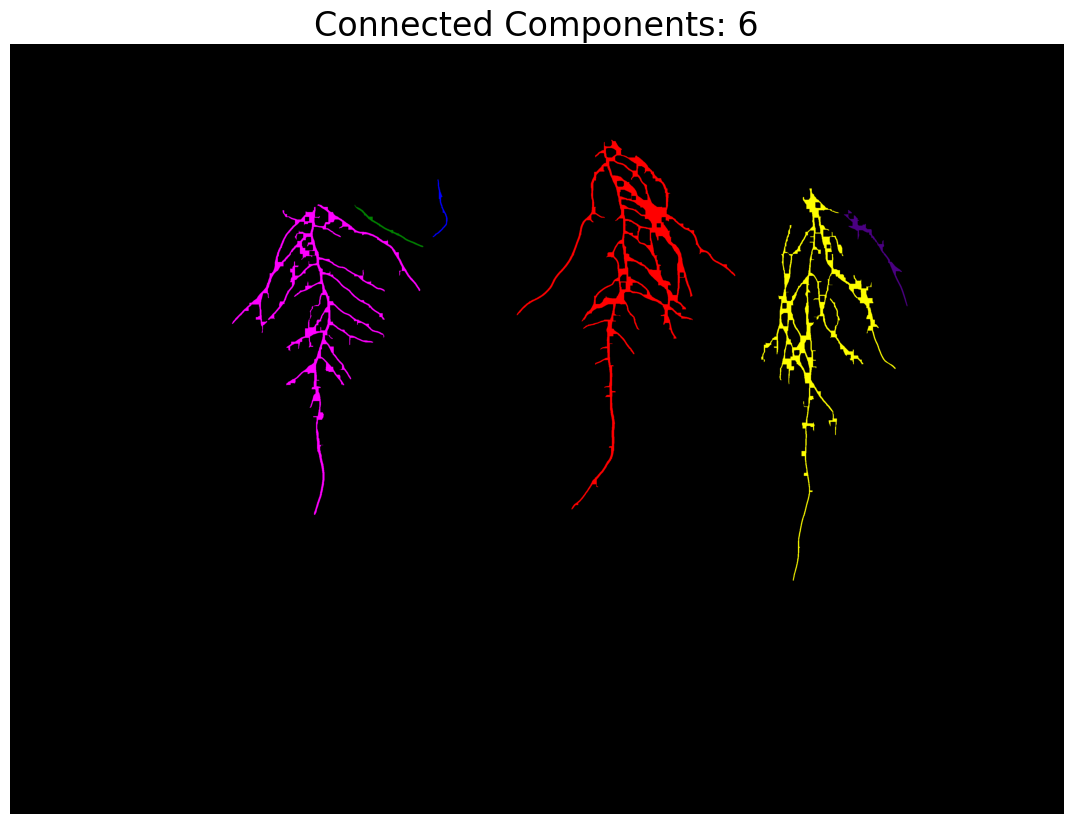

In [74]:
from skimage.measure import label
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Label connected components in the binary mask
labeled_mask = label(cleaned_mask > 0)  # Ensure mask is binary (True for foreground pixels)

# Count the number of connected components (excluding the background)
num_connected_components = labeled_mask.max()
print(f"Number of connected components: {num_connected_components}")

# Convert labeled mask to a color image for visualization
colored_labels = label2rgb(labeled_mask, bg_label=0, bg_color=(0, 0, 0), colors=None)

# Plot the labeled connected components
plt.figure(figsize=(15, 10))
plt.title(f"Connected Components: {num_connected_components}", fontsize=24)
plt.imshow(colored_labels)
plt.axis('off')
plt.show()


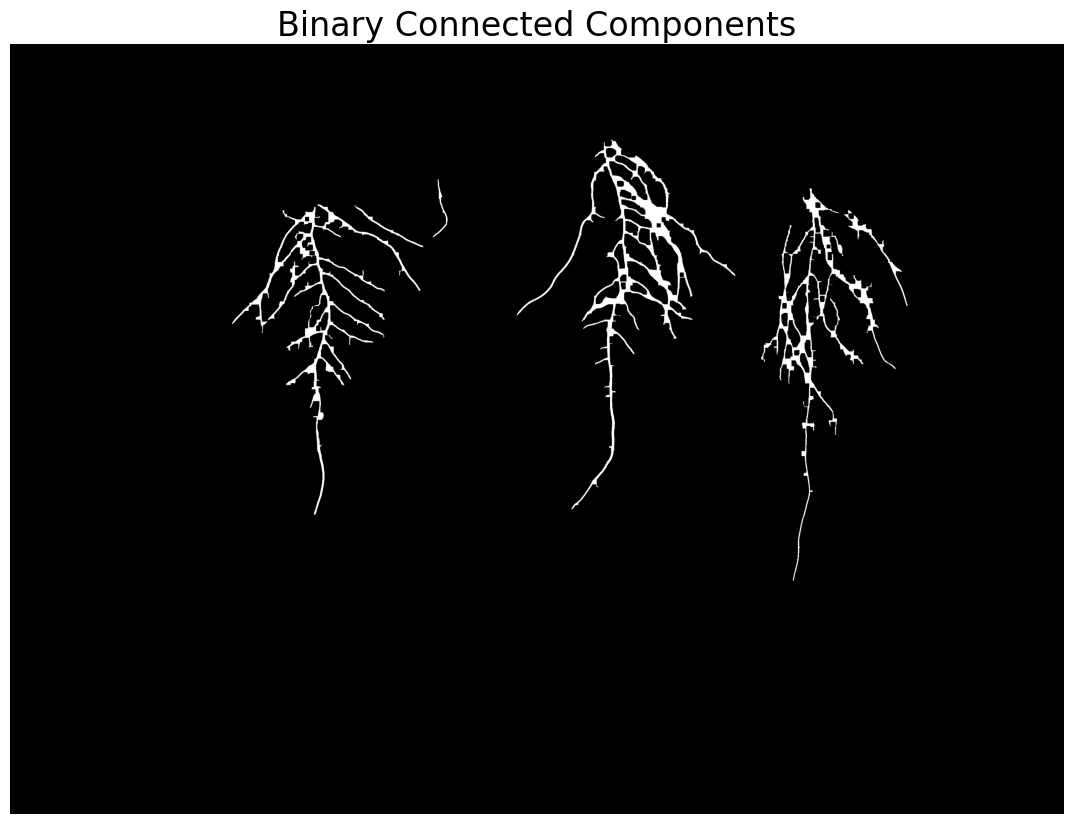

In [89]:
# Convert the labeled mask back to binary
binary_labels = (labeled_mask > 0).astype(int)  # Set all non-zero labels to 1, keeping the mask binary

# Plot the binary connected components
plt.figure(figsize=(15, 10))
plt.title("Binary Connected Components", fontsize=24)
plt.imshow(binary_labels, cmap='gray')
plt.axis('off')
plt.show()


--- 

# Task 7 

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2

from skimage.morphology import skeletonize
from skimage.morphology import remove_small_objects
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph

In [98]:
skeleton_object = skeletonize(binary_labels)  # Compute the skeleton of the cleaned mask)

In [102]:
# Convert the numpy ndarray skeleton into a skan Skeleton object
skeleton_data = Skeleton(skeleton_object)

(-0.5, 4111.5, 3005.5, -0.5)

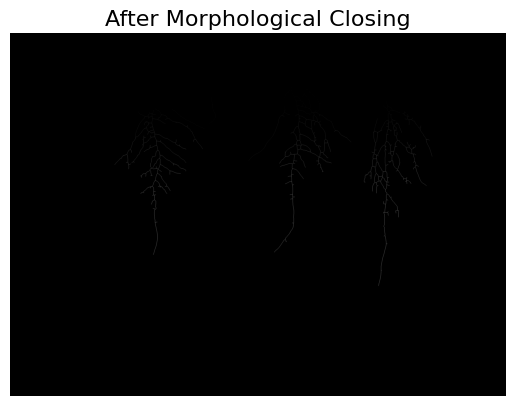

In [103]:
plt.title("After Morphological Closing", fontsize=16)
plt.imshow(skeleton_data , cmap='gray')
plt.axis('off')

In [105]:
type(skeleton_data)

skan.csr.Skeleton

In [107]:
branch_data = summarize(skeleton_data)
branch_data

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,0,0,39,26.142136,1,1.0,0.0,375,2347,397,2357,375,2347,397,2357,24.166092
1,0,7,79,22.656854,1,1.0,0.0,382,2319,403,2321,382,2319,403,2321,21.095023
2,0,39,79,38.485281,2,1.0,0.0,397,2357,403,2321,397,2357,403,2321,36.496575
3,0,39,120,25.627417,2,1.0,0.0,397,2357,415,2374,397,2357,415,2374,24.758837
4,0,79,136,17.828427,2,1.0,0.0,403,2321,420,2319,403,2321,420,2319,17.117243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0,19769,19845,24.727922,1,1.0,0.0,1711,2281,1728,2294,1711,2281,1728,2294,21.400935
510,2,19897,19906,9.000000,1,1.0,0.0,1745,3119,1745,3128,1745,3119,1745,3128,9.000000
511,2,19897,20293,237.811183,2,1.0,0.0,1745,3119,1965,3076,1745,3119,1965,3076,224.162887
512,2,20293,20297,4.000000,1,1.0,0.0,1965,3076,1965,3080,1965,3076,1965,3080,4.000000


In [108]:
import networkx as nx

In [109]:
# This is how we can convert the output of skan to a NetworkX graph
G = nx.from_pandas_edgelist(branch_data, source='node-id-src', target='node-id-dst', edge_attr='branch-distance')

In [110]:
G.nodes

NodeView((0, 39, 7, 79, 120, 136, 109, 163, 238, 297, 319, 342, 246, 428, 664, 391, 543, 546, 779, 1266, 665, 1941, 594, 686, 825, 1724, 1018, 1089, 818, 1328, 1242, 1403, 1108, 1513, 1499, 1591, 1248, 2257, 5006, 1351, 1390, 1735, 1846, 1930, 2322, 2154, 1758, 6009, 1766, 2736, 1835, 2238, 1845, 2641, 1855, 2464, 2341, 2271, 2126, 2262, 2141, 3183, 2478, 2209, 2429, 2356, 2757, 2310, 2540, 2899, 2817, 2852, 2462, 3046, 3048, 2735, 4000, 2794, 2480, 3226, 2587, 3106, 3146, 3024, 2663, 2713, 2802, 3483, 3804, 3151, 6376, 3854, 4104, 4330, 13220, 3268, 3747, 3513, 3316, 3557, 3117, 7627, 3664, 3533, 3434, 3879, 3883, 4539, 3523, 4407, 3550, 6509, 4791, 3631, 3856, 4141, 5054, 5001, 4160, 4385, 5257, 5892, 6257, 4471, 4322, 6036, 4190, 4430, 4236, 4641, 5314, 5321, 5488, 4426, 4947, 4767, 5260, 5036, 5551, 4743, 5247, 5839, 5600, 6878, 5021, 5566, 5083, 8110, 5307, 5446, 5364, 6287, 6297, 6716, 7110, 5524, 8101, 6131, 5901, 6205, 6596, 8089, 6934, 6386, 7143, 6669, 6601, 6759, 6384, 6261,

In [111]:
G.number_of_nodes()

478

In [112]:
G.number_of_edges()

513

In [113]:
# Now you know connected components come from graph theory
list(nx.connected_components(G))

[{0,
  7,
  39,
  79,
  109,
  120,
  136,
  163,
  238,
  246,
  297,
  319,
  342,
  391,
  428,
  543,
  546,
  594,
  664,
  665,
  686,
  779,
  825,
  1018,
  1089,
  1242,
  1248,
  1266,
  1403,
  1499,
  1591,
  1724,
  1835,
  1845,
  1846,
  1941,
  2238,
  2257,
  2271,
  2322,
  2356,
  2641,
  2757,
  2817,
  2852,
  2899,
  3024,
  3146,
  3151,
  3268,
  3513,
  3523,
  3747,
  4104,
  4141,
  4236,
  4322,
  4330,
  4407,
  4641,
  5054,
  5083,
  5247,
  5314,
  5488,
  6036,
  6376,
  6656,
  6716,
  6838,
  6934,
  6968,
  7110,
  7736,
  7784,
  8110,
  8227,
  8333,
  8350,
  8567,
  8661,
  8832,
  8915,
  8987,
  9186,
  9465,
  9501,
  9726,
  9760,
  9894,
  10487,
  10697,
  11192,
  11254,
  11257,
  11260,
  11278,
  11387,
  11404,
  11645,
  11777,
  11846,
  12427,
  12485,
  12525,
  12705,
  13178,
  13220,
  13331,
  13354,
  13382,
  13783,
  13812,
  13852,
  13891,
  13908,
  13957,
  14224,
  14592,
  14636,
  14638,
  14679,
  14878,
  15367,
  1

In [ ]:
path_list = nx.dijkstra_path(G, 7, 3, weight='branch-distance')
path_list

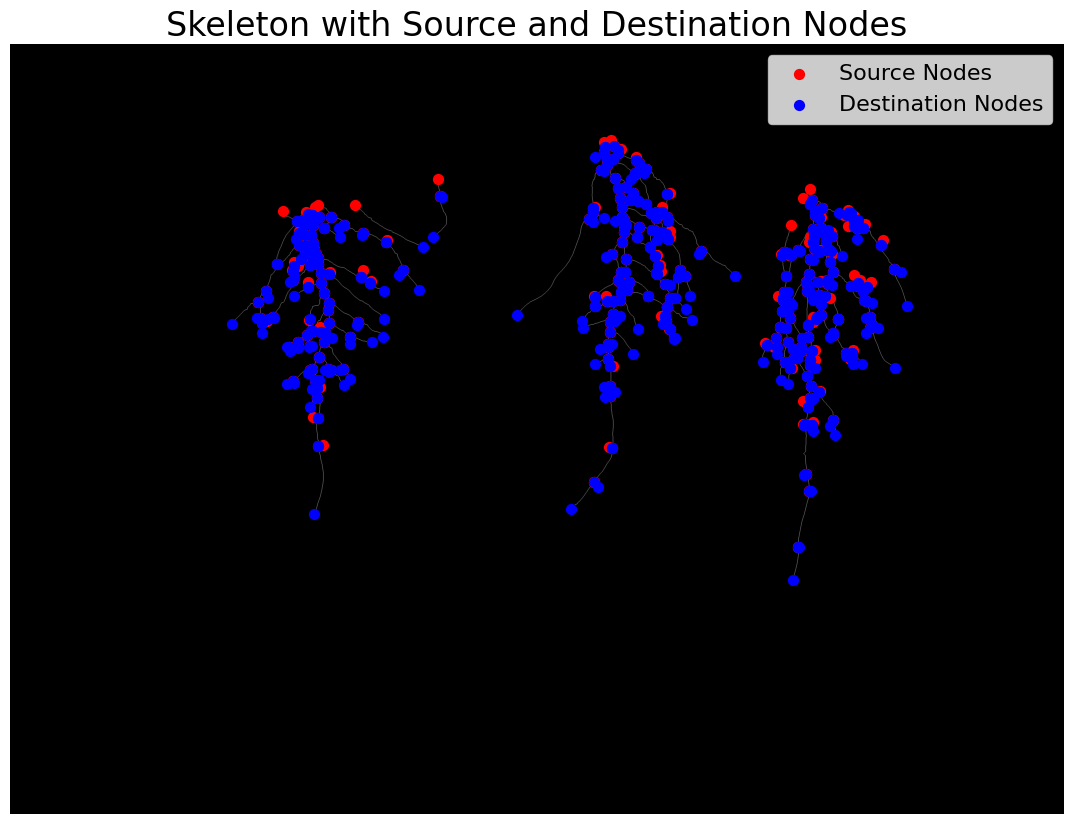

In [114]:
# Extract source and destination coordinates from branch_data
source_coords = branch_data[['coord-src-0', 'coord-src-1']].values  # Source nodes
destination_coords = branch_data[['coord-dst-0', 'coord-dst-1']].values  # Destination nodes

# Plot the skeleton with points overlaid
plt.figure(figsize=(15, 10))
plt.title("Skeleton with Source and Destination Nodes", fontsize=24)

# Display the skeleton image
plt.imshow(skeleton_object, cmap='gray')  # The skeleton image as a base

# Overlay source points
plt.scatter(source_coords[:, 1], source_coords[:, 0], color='red', label='Source Nodes', s=50)

# Overlay destination points
plt.scatter(destination_coords[:, 1], destination_coords[:, 0], color='blue', label='Destination Nodes', s=50)

# Add a legend and remove axes
plt.legend(fontsize=16)
plt.axis('off')

plt.show()


   skeleton-id  start_y  start_x   end_y   end_x
0            0    375.0   2347.0  1815.0  2191.0
1            1    528.0   1670.0   752.0  1649.0
2            2    565.0   3121.0  2093.0  3055.0
3            3    628.0   1345.0   791.0  1611.0
4            4    629.0   1202.0  1836.0  1187.0
5            5    649.0   3270.0  1022.0  3500.0


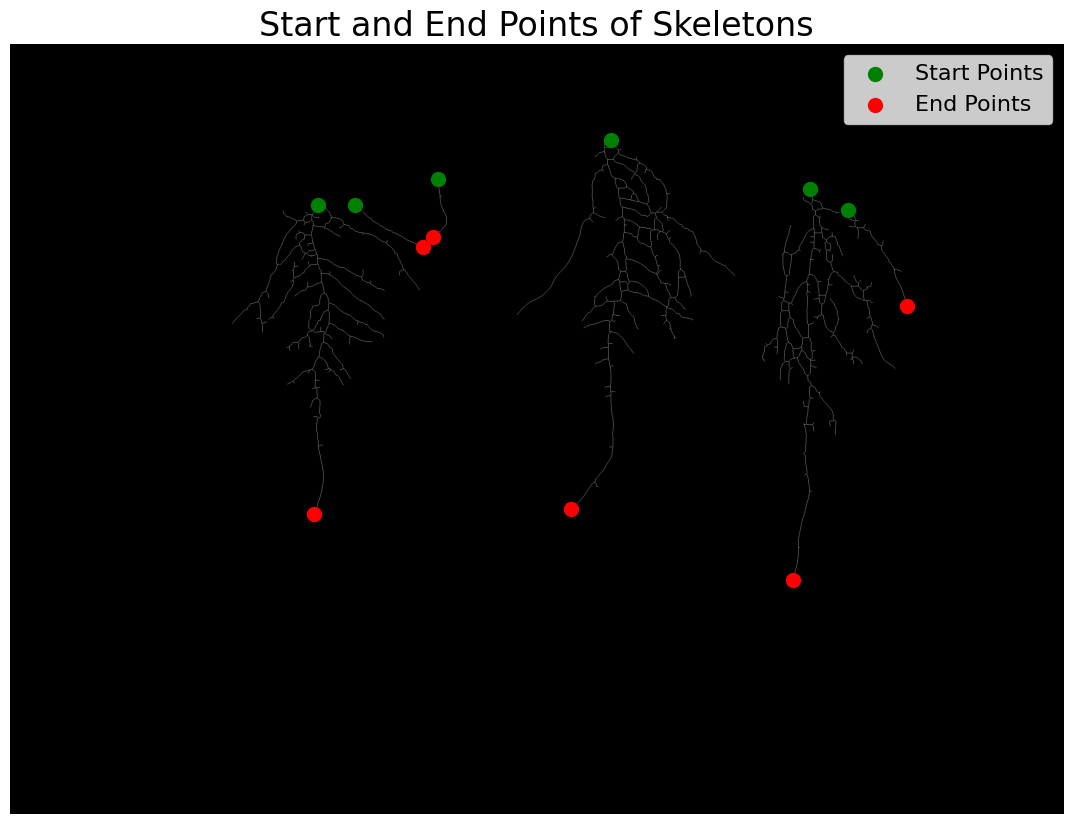

In [115]:
# Import necessary libraries
import pandas as pd

# Group the data by skeleton-id and compute the required coordinates
results = []

# Iterate over each unique skeleton-id
for skeleton_id, group in branch_data.groupby("skeleton-id"):
    # Find the branch with the minimum y-coordinate (start of the root)
    start_branch = group.loc[group[["image-coord-src-0", "image-coord-dst-0"]].min(axis=1).idxmin()]
    start_y = start_branch[["image-coord-src-0", "image-coord-dst-0"]].min()
    start_x = start_branch[["image-coord-src-1", "image-coord-dst-1"]].iloc[start_branch[["image-coord-src-0", "image-coord-dst-0"]].argmin()]
    
    # Find the branch with the maximum y-coordinate (end of the root)
    end_branch = group.loc[group[["image-coord-src-0", "image-coord-dst-0"]].max(axis=1).idxmax()]
    end_y = end_branch[["image-coord-src-0", "image-coord-dst-0"]].max()
    end_x = end_branch[["image-coord-src-1", "image-coord-dst-1"]].iloc[end_branch[["image-coord-src-0", "image-coord-dst-0"]].argmax()]
    
    # Append results
    results.append({
        "skeleton-id": skeleton_id,
        "start_y": start_y,
        "start_x": start_x,
        "end_y": end_y,
        "end_x": end_x
    })

# Convert the results to a DataFrame
start_end_df = pd.DataFrame(results)

# Display the results
print(start_end_df)

# Optional: Visualize the points
plt.figure(figsize=(15, 10))
plt.title("Start and End Points of Skeletons", fontsize=24)
plt.imshow(skeleton_object, cmap='gray')

# Overlay start points
plt.scatter(start_end_df["start_x"], start_end_df["start_y"], color='green', label='Start Points', s=100)

# Overlay end points
plt.scatter(start_end_df["end_x"], start_end_df["end_y"], color='red', label='End Points', s=100)

plt.legend(fontsize=16)
plt.axis('off')
plt.show()


In [121]:
start_end_df

,skeleton-id,start_y,start_x,end_y,end_x
0,0,375.0,2347.0,1815.0,2191.0
1,1,528.0,1670.0,752.0,1649.0
2,2,565.0,3121.0,2093.0,3055.0
3,3,628.0,1345.0,791.0,1611.0
4,4,629.0,1202.0,1836.0,1187.0
5,5,649.0,3270.0,1022.0,3500.0


In [138]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming branch_data contains the data needed to build the graph
# Create the NetworkX graph
G = nx.from_pandas_edgelist(branch_data, source='node-id-src', target='node-id-dst', edge_attr='branch-distance')

# Create a mapping from (y, x) coordinates to node IDs using branch_data
coordinate_to_node = {}
for _, row in branch_data.iterrows():
    coordinate_to_node[(row['image-coord-src-0'], row['image-coord-src-1'])] = row['node-id-src']
    coordinate_to_node[(row['image-coord-dst-0'], row['image-coord-dst-1'])] = row['node-id-dst']

# Iterate over start and end nodes in the start_end_df DataFrame
for _, row in start_end_df.iterrows():
    # Map coordinates to node IDs
    src_node = coordinate_to_node.get((row['start_y'], row['start_x']), None)
    dst_node = coordinate_to_node.get((row['end_y'], row['end_x']), None)

    # Ensure both nodes are in the graph
    if src_node is not None and dst_node is not None and src_node in G.nodes and dst_node in G.nodes:
        try:
            # Calculate shortest path and path length
            path_list = nx.dijkstra_path(G, src_node, dst_node, weight='branch-distance')
            path_len = nx.dijkstra_path_length(G, src_node, dst_node, weight='branch-distance')

            print(f"Shortest path from node {src_node} to node {dst_node}: {path_list}")
            print(f"Path length: {path_len}")
        except nx.NetworkXNoPath:
            print(f"No path exists between node {src_node} and node {dst_node}")
    else:
        print(f"One or both nodes ({row['start_y']}, {row['start_x']}) or ({row['end_y']}, {row['end_x']}) not mapped or not in graph")


Shortest path from node 0.0 to node 20121.0: [0.0, 39, 79, 136, 297, 428, 779, 1089, 1403, 1846, 2641, 3024, 3513, 4407, 5488, 7110, 8350, 8333, 9186, 9501, 10697, 11645, 11846, 13178, 13783, 13957, 14878, 15857, 16102, 16859, 17324, 18080, 18224, 18325, 19350, 19769, 20121]
Path length: 1692.7737367038067
Shortest path from node 818.0 to node 5006.0: [818.0, 1328, 5006]
Path length: 268.137084989848
Shortest path from node 1108.0 to node 20425.0: [1108.0, 1513, 1735, 2154, 2478, 4000, 4471, 5036, 5566, 6131, 7143, 8691, 9480, 9798, 10677, 14293, 15351, 16409, 16955, 16985, 17276, 17777, 18070, 18362, 18602, 18944, 18950, 19666, 19897, 20293, 20425]
Path length: 1670.666088965482
Shortest path from node 1758.0 to node 6009.0: [1758.0, 6009]
Path length: 339.96046148071133
Shortest path from node 1766.0 to node 20163.0: [1766.0, 2736, 3804, 3557, 4791, 5600, 6205, 6669, 7052, 7574, 8514, 9562, 10879, 12056, 12783, 14133, 14991, 15029, 15716, 16721, 17475, 17915, 18139, 18151, 18375, 187

In [139]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming branch_data contains the data needed to build the graph
# Create the NetworkX graph
G = nx.from_pandas_edgelist(branch_data, source='node-id-src', target='node-id-dst', edge_attr='branch-distance')

# Create a mapping from (y, x) coordinates to node IDs using branch_data
coordinate_to_node = {}
for _, row in branch_data.iterrows():
    coordinate_to_node[(row['image-coord-src-0'], row['image-coord-src-1'])] = row['node-id-src']
    coordinate_to_node[(row['image-coord-dst-0'], row['image-coord-dst-1'])] = row['node-id-dst']

# Add a new column to store path lengths in start_end_df
path_lengths = []

for _, row in start_end_df.iterrows():
    # Map coordinates to node IDs
    src_node = coordinate_to_node.get((row['start_y'], row['start_x']), None)
    dst_node = coordinate_to_node.get((row['end_y'], row['end_x']), None)

    # Ensure both nodes are in the graph
    if src_node is not None and dst_node is not None and src_node in G.nodes and dst_node in G.nodes:
        try:
            # Calculate shortest path length
            path_len = nx.dijkstra_path_length(G, src_node, dst_node, weight='branch-distance')
            path_lengths.append(path_len)
        except nx.NetworkXNoPath:
            path_lengths.append(None)  # No path exists
    else:
        path_lengths.append(None)  # Nodes not in graph or not mapped

# Add the path lengths as a new column to start_end_df
start_end_df['path_length'] = path_lengths

# Display the updated DataFrame
print(start_end_df)


   skeleton-id  start_y  start_x   end_y   end_x  path_length
0            0    375.0   2347.0  1815.0  2191.0  1692.773737
1            1    528.0   1670.0   752.0  1649.0   268.137085
2            2    565.0   3121.0  2093.0  3055.0  1670.666089
3            3    628.0   1345.0   791.0  1611.0   339.960461
4            4    629.0   1202.0  1836.0  1187.0  1445.335137
5            5    649.0   3270.0  1022.0  3500.0   514.730014
